In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import dates as mpl_dates
import itertools
import matplotlib as mplt
import datetime
import warnings
warnings.filterwarnings("ignore")  # 忽略版本问题

In [2]:
df = pd.read_excel("慢性肾病数据.xlsx")
df.head()

,医院代码,医院名称,性别,遗传性肾脏病病史,慢性肾炎家族史,肾移植病史,肾穿刺活检术史,高血压病史,糖尿病病史,高尿血酸症,...,尿常规蛋白指标,尿蛋白阳性,尿红细胞数值,尿红细胞单位,尿白蛋白肌酐比,血肌酐,eGFR,确诊日期,CKD分层,CKD评级
0,42504704X00,闵行区中心医院,男,无,无,否,否,有,无,否,...,阴性,NaN,10.0,HP,<30,70.6,88.1,2017-11-02 16:51:06,低危,CKD2期
1,42504710300,上海市第五人民医院,女,无,无,否,否,有,无,否,...,NaN,NaN,NaN,HP,30~300,83.5,NaN,2017-12-07 13:59:30,高危,CKD3期
2,42504710300,上海市第五人民医院,女,无,无,否,否,有,无,否,...,阳性,+,0.0,HP,>300,59.4,85.0,2017-10-03 14:30:06,高危,CKD2期
3,42504704X00,闵行区中心医院,女,无,无,否,否,有,无,否,...,阳性,±,15.0,HP,<30,64.0,87.6,2018-01-24 20:32:26,低危,CKD2期
4,42504704X00,闵行区中心医院,女,无,无,否,否,有,无,否,...,阳性,+,0.0,HP,30~300,62.1,79.5,2017-10-13 20:11:38,中危,CKD2期


In [3]:
# 格式化时间
for date in df['确诊日期']:
    date = pd.to_datetime(date,format = '%Y-%m-%d %H:%M:%S')
df.head(2)

,医院代码,医院名称,性别,遗传性肾脏病病史,慢性肾炎家族史,肾移植病史,肾穿刺活检术史,高血压病史,糖尿病病史,高尿血酸症,...,尿常规蛋白指标,尿蛋白阳性,尿红细胞数值,尿红细胞单位,尿白蛋白肌酐比,血肌酐,eGFR,确诊日期,CKD分层,CKD评级
0,42504704X00,闵行区中心医院,男,无,无,否,否,有,无,否,...,阴性,NaN,10.0,HP,<30,70.6,88.1,2017-11-02 16:51:06,低危,CKD2期
1,42504710300,上海市第五人民医院,女,无,无,否,否,有,无,否,...,NaN,NaN,NaN,HP,30~300,83.5,NaN,2017-12-07 13:59:30,高危,CKD3期


In [4]:
# check unique values
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values, {df[i].unique()}')

医院代码 : 7 values, ['42504704X00' '42504710300' '42504213400' '42520097X00' '42503893600'
 '42500653900' '42504200300']
医院名称 : 7 values, ['闵行区中心医院' '上海市第五人民医院' '静安区闸北中心医院' '静安区市北医院' '静安区中心医院' '复旦大学附属华山医院' '北站医院']
性别 : 2 values, ['男' '女']
遗传性肾脏病病史 : 2 values, ['无' nan '有']
慢性肾炎家族史 : 2 values, ['无' nan '有']
肾移植病史 : 2 values, ['否' nan '是']
肾穿刺活检术史 : 2 values, ['否' nan '是']
高血压病史 : 2 values, ['有' '无' nan]
糖尿病病史 : 2 values, ['无' '有' nan]
高尿血酸症 : 4 values, ['否' '是' nan '有' '无']
肾脏超声发现构造异常 : 3 values, ['无' nan '是' '否']
尿常规蛋白指标 : 2 values, ['阴性' nan '阳性']
尿蛋白阳性 : 5 values, [nan '+' '±' '2+' '3+' '5+']
尿红细胞数值 : 98 values, [1.0000e+01        nan 0.0000e+00 1.5000e+01 5.0000e+00 2.0000e+01
 1.0000e+02 1.3000e+01 1.7000e+01 3.0000e+00 4.0000e+00 3.0000e+01
 6.0000e+00 1.0000e+00 2.0000e+00 8.0000e+00 9.0000e+00 7.0000e+00
 1.8000e+01 5.3000e+01 2.5000e+01 1.2000e+01 2.2900e+01 1.6470e+02
 1.7200e+01 2.1000e+01 6.4000e+00 2.7400e+01 1.4300e+02 1.0300e+01
 3.8000e+00 6.5000e+00 6.2000e+00 3.8800e+01 4

In [5]:
# 纠正某些值，比如’是‘，’有‘统一为’有‘
df['医院代码'] = df['医院代码'].replace(to_replace={'42504704X00':1, '42504710300':2, '42504213400':3,
                                            '42520097X00':4, '42503893600':5, '42500653900':6, 
                                            '42504200300':7})
df = df.drop('医院名称',axis=1)
df['性别'] = df['性别'].replace(to_replace={'男':1,'女':2})
df['遗传性肾脏病病史'] = df['遗传性肾脏病病史'].replace(to_replace={'无':0, '有':1})
df['慢性肾炎家族史'] = df['慢性肾炎家族史'].replace(to_replace={'无':0, '有':1})
df['肾移植病史'] = df['肾移植病史'].replace(to_replace = {'是':1,'否':0})
df['肾穿刺活检术史'] = df['肾穿刺活检术史'].replace(to_replace = {'是':1,'否':0})
df['高血压病史'] = df['高血压病史'].replace(to_replace = {'有':1,'无':0})
df['糖尿病病史'] = df['糖尿病病史'].replace(to_replace = {'有':1,'无':0})
df['高尿血酸症'] = df['高尿血酸症'].replace(to_replace = {'是':1,'否':0,'有':1, '无':0})
df['肾脏超声发现构造异常'] = df['肾脏超声发现构造异常'].replace(to_replace = {'是':1,'有':1,'否':0,'无':0})
df['尿常规蛋白指标'] = df['尿常规蛋白指标'].replace(to_replace = {'阳性':1,'阴性':0})
df['尿蛋白阳性'] = df['尿蛋白阳性'].replace(to_replace={'+':1, '±':0.1,'2+':2,'3+':3,'4+':4,'5+':5})                              
# 忽略尿红细胞单位这个数据类别
df = df.drop(['尿红细胞单位'],axis=1)     
df['尿白蛋白肌酐比'] = df['尿白蛋白肌酐比'].replace(to_replace={'<30':1, '30~300':2, '>300':3})  
df['CKD分层'] = df['CKD分层'].replace(to_replace={'低危':1, '高危':3, '中危':2, '极高危':4})  
df['CKD评级'] = df['CKD评级'].replace(to_replace={'CKD2期':2, 'CKD3期':3, 'CKD1期':1, 'CKD4期':4, 'CKD5期':5})

#分组尿红细胞数值。由于测量用了hp，ul两种方法，无法统一。
# 且了解到一般只要数字大于0就是有问题的。所以进行分组此处用的开区间
rv = []
for i in df['尿红细胞数值'].index:
    # print(df['尿红细胞数值'][i])
    if df['尿红细胞数值'][i] > 0.0:
        rv.append(1)
    else: # nan + 0.0
        rv.append(0)
# 用rv替换df
new = pd.core.frame.DataFrame([rv],index=['尿红细胞'])
data=new.T #转置
data.rename(columns={0:'尿红细胞'},inplace=True)
df['尿红细胞数值'] = data['尿红细胞']


print(df.columns)

# check unique values
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

Index(['医院代码', '性别', '遗传性肾脏病病史', '慢性肾炎家族史', '肾移植病史', '肾穿刺活检术史', '高血压病史',
       '糖尿病病史', '高尿血酸症', '肾脏超声发现构造异常', '尿常规蛋白指标', '尿蛋白阳性', '尿红细胞数值', '尿白蛋白肌酐比',
       '血肌酐', 'eGFR', '确诊日期', 'CKD分层', 'CKD评级'],
      dtype='object')
医院代码 : 7 values
性别 : 2 values
遗传性肾脏病病史 : 2 values
慢性肾炎家族史 : 2 values
肾移植病史 : 2 values
肾穿刺活检术史 : 2 values
高血压病史 : 2 values
糖尿病病史 : 2 values
高尿血酸症 : 2 values
肾脏超声发现构造异常 : 2 values
尿常规蛋白指标 : 2 values
尿蛋白阳性 : 5 values
尿红细胞数值 : 2 values
尿白蛋白肌酐比 : 3 values
血肌酐 : 498 values
eGFR : 527 values
确诊日期 : 1150 values
CKD分层 : 4 values
CKD评级 : 5 values


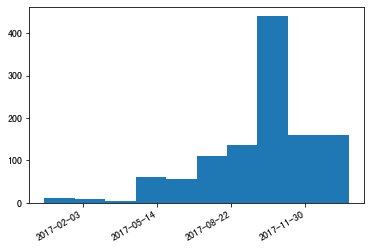

In [6]:
#查看确诊时间的分布
dates = np.array(df['确诊日期'])
list_of_dates = dates.tolist()
plt.hist(mpl_dates.date2num(list_of_dates))
plt.gca().xaxis.set_major_formatter(mplt.ticker.FuncFormatter(lambda numdate, _: mpl_dates.num2date(numdate).strftime('%Y-%m-%d')))
plt.gcf().autofmt_xdate()
plt.show()

# 移除数值特征里的时间
df = df.drop('确诊日期',axis=1)



In [7]:
# 将数值类型多的划分为numerical_features, 将数值类型少的划分为categorical_features
print(df.columns)
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
        

# 查看分类特征
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')   
    
# 查看数值特征分布
for feats in numerical_features:
    print(f'{feats} has {df[feats].nunique()} variables.\n')   
 

Index(['医院代码', '性别', '遗传性肾脏病病史', '慢性肾炎家族史', '肾移植病史', '肾穿刺活检术史', '高血压病史',
       '糖尿病病史', '高尿血酸症', '肾脏超声发现构造异常', '尿常规蛋白指标', '尿蛋白阳性', '尿红细胞数值', '尿白蛋白肌酐比',
       '血肌酐', 'eGFR', 'CKD分层', 'CKD评级'],
      dtype='object')
医院代码 has [1 2 3 4 5 6 7] categories.

性别 has [1 2] categories.

遗传性肾脏病病史 has [ 0. nan  1.] categories.

慢性肾炎家族史 has [ 0. nan  1.] categories.

肾移植病史 has [ 0. nan  1.] categories.

肾穿刺活检术史 has [ 0. nan  1.] categories.

高血压病史 has [ 1.  0. nan] categories.

糖尿病病史 has [ 0.  1. nan] categories.

高尿血酸症 has [ 0.  1. nan] categories.

肾脏超声发现构造异常 has [ 0. nan  1.] categories.

尿常规蛋白指标 has [ 0. nan  1.] categories.

尿蛋白阳性 has [nan 1.  0.1 2.  3.  5. ] categories.

尿红细胞数值 has [1 0] categories.

尿白蛋白肌酐比 has [ 1.  2.  3. nan] categories.

CKD分层 has [1 3 2 4] categories.

CKD评级 has [2 3 1 4 5] categories.

血肌酐 has 498 variables.

eGFR has 527 variables.



尿蛋白阳性         725
eGFR          320
尿常规蛋白指标       103
尿白蛋白肌酐比        96
慢性肾炎家族史        87
血肌酐            86
肾脏超声发现构造异常     84
遗传性肾脏病病史       84
肾移植病史          83
肾穿刺活检术史        83
高血压病史          83
糖尿病病史          82
高尿血酸症          82
CKD分层           0
医院代码            0
尿红细胞数值          0
性别              0
CKD评级           0
dtype: int64


<AxesSubplot:>

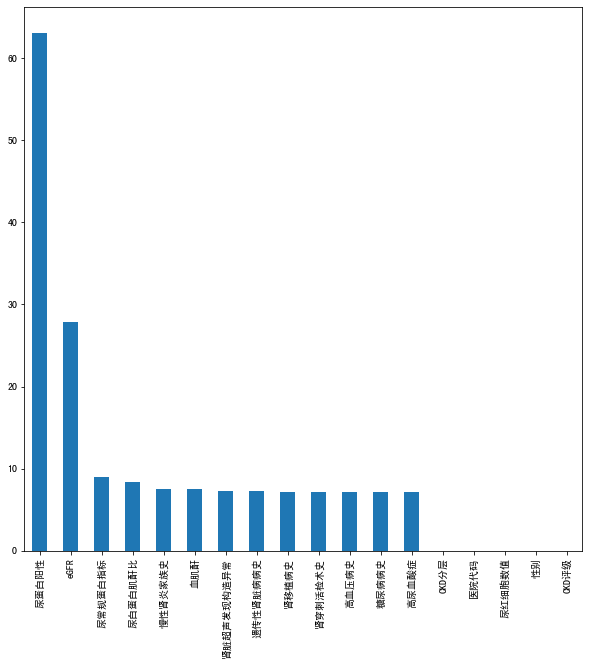

In [8]:
# check missing value
print(df.isnull().sum().sort_values(ascending=False))

# plot missing values percentage

((df.isnull().sum()/df.shape[0])*100).sort_values(
    ascending=False).plot(kind='bar', figsize=(10,10))


In [9]:
# '尿蛋白阳性'空缺较多，需要对值进行填充
# 用'尿常规蛋白指标'的阴性填充'尿蛋白阳性'值。因为考虑到为阴性可能不会有'尿蛋白阳性'值。因此根据阴性填充0
# 并且可以根据值，去掉'尿常规蛋白指标'这个属性，用'尿蛋白阳性'值来代替
df['尿蛋白阳性'] = df['尿蛋白阳性'].fillna(df['尿常规蛋白指标'])
df = df.drop('尿常规蛋白指标', axis=1)
categorical_features.remove('尿常规蛋白指标')
print(df.head(20))


    医院代码  性别  遗传性肾脏病病史  慢性肾炎家族史  肾移植病史  肾穿刺活检术史  高血压病史  糖尿病病史  高尿血酸症  \
0      1   1       0.0      0.0    0.0      0.0    1.0    0.0    0.0   
1      2   2       0.0      0.0    0.0      0.0    1.0    0.0    0.0   
2      2   2       0.0      0.0    0.0      0.0    1.0    0.0    0.0   
3      1   2       0.0      0.0    0.0      0.0    1.0    0.0    0.0   
4      1   2       0.0      0.0    0.0      0.0    1.0    0.0    0.0   
5      1   2       0.0      0.0    0.0      0.0    1.0    1.0    0.0   
6      1   2       0.0      0.0    0.0      0.0    1.0    1.0    0.0   
7      1   2       0.0      0.0    0.0      0.0    1.0    0.0    0.0   
8      2   1       0.0      0.0    0.0      0.0    1.0    1.0    0.0   
9      1   1       0.0      0.0    0.0      0.0    0.0    1.0    0.0   
10     1   2       0.0      0.0    0.0      0.0    1.0    0.0    0.0   
11     1   1       0.0      0.0    0.0      0.0    0.0    0.0    0.0   
12     2   2       0.0      0.0    0.0      0.0    0.0    0.0   

<AxesSubplot:>

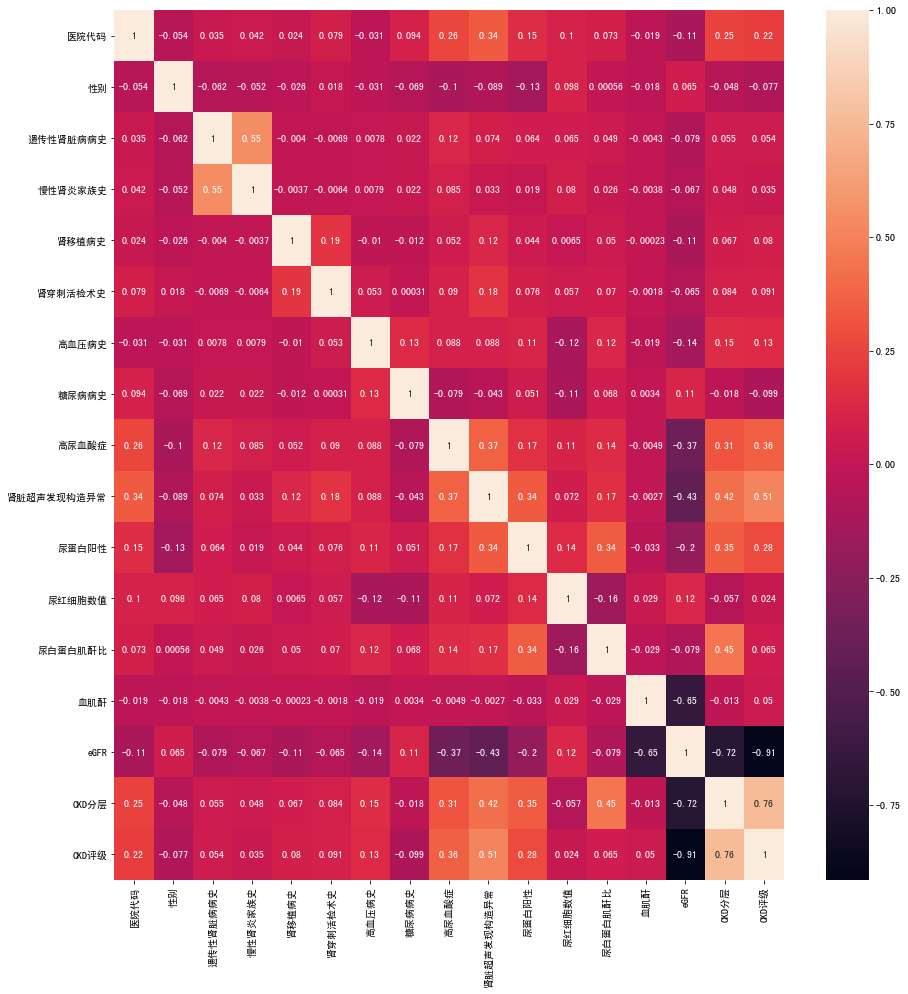

In [10]:
# 特征相关性分析
plt.figure(figsize=(15,16))
sns.heatmap(df.corr(),annot = True)
# 可看出出了，CKD评级与分层，其他之间关系不大。
# 所以处理剩余空值选择直接删除这一行数据

In [11]:
# 删除'eGFR'...为空值的数据
new_data = df.dropna(subset=['eGFR','尿蛋白阳性','尿白蛋白肌酐比',
                             '慢性肾炎家族史','血肌酐','肾脏超声发现构造异常',
                             '遗传性肾脏病病史','肾移植病史','肾穿刺活检术史',
                             '高血压病史','高尿血酸症','糖尿病病史'])
print(new_data.isnull().sum())
print(new_data.shape)


医院代码          0
性别            0
遗传性肾脏病病史      0
慢性肾炎家族史       0
肾移植病史         0
肾穿刺活检术史       0
高血压病史         0
糖尿病病史         0
高尿血酸症         0
肾脏超声发现构造异常    0
尿蛋白阳性         0
尿红细胞数值        0
尿白蛋白肌酐比       0
血肌酐           0
eGFR          0
CKD分层         0
CKD评级         0
dtype: int64
(790, 17)


<AxesSubplot:>

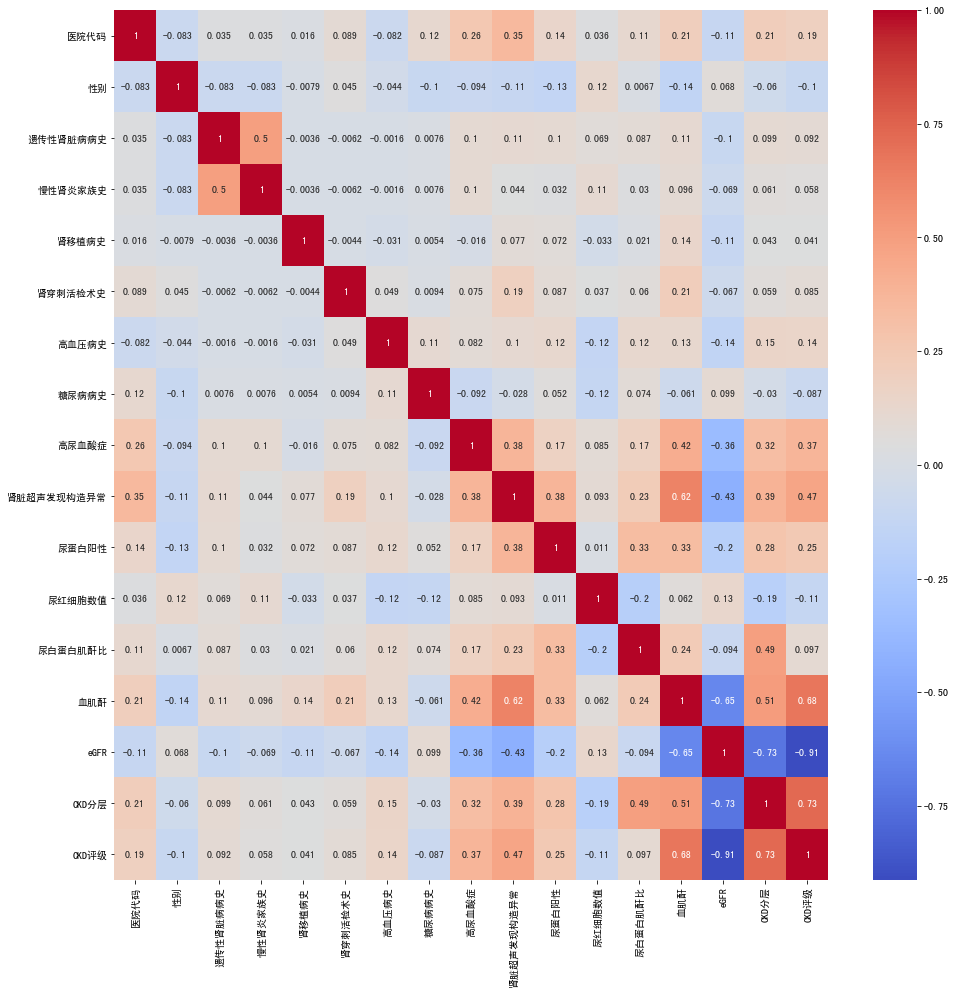

In [12]:
# 数据相关性分析
plt.figure(figsize=(16,16))
sns.heatmap(new_data.corr(),cmap='coolwarm',annot = True)

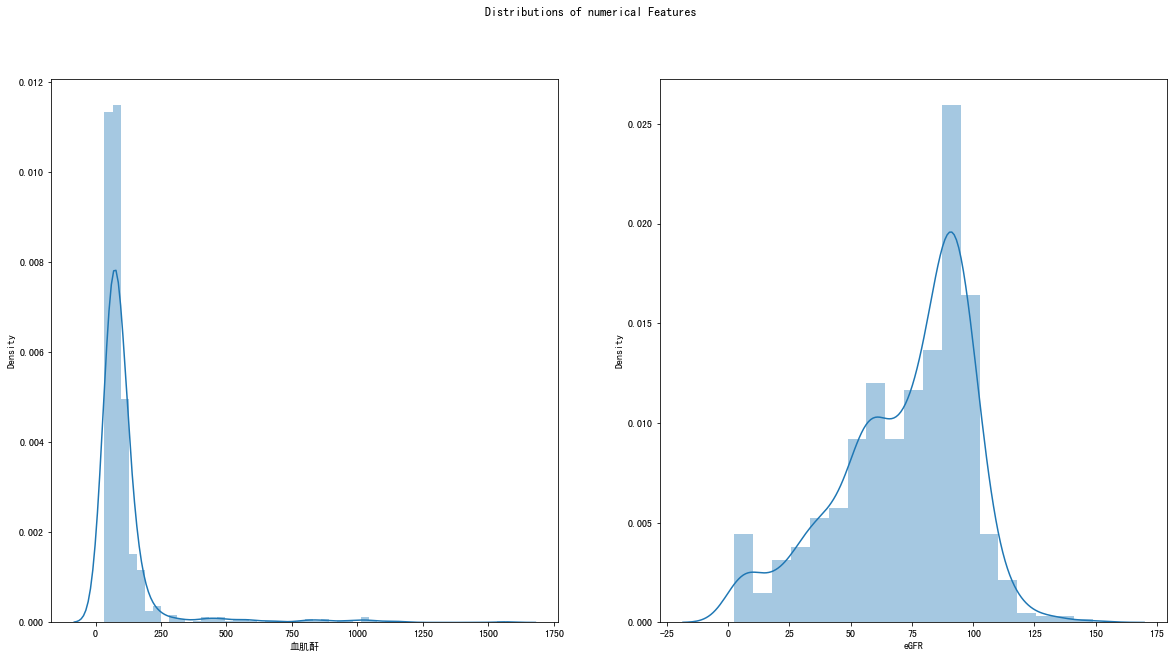

In [13]:
# 查看numerical_features的分布
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')
for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(a=new_data[feats], ax=ax)
    
    
# eGFR is also a bit left skewed
# Rest of the features are lightly skewed  



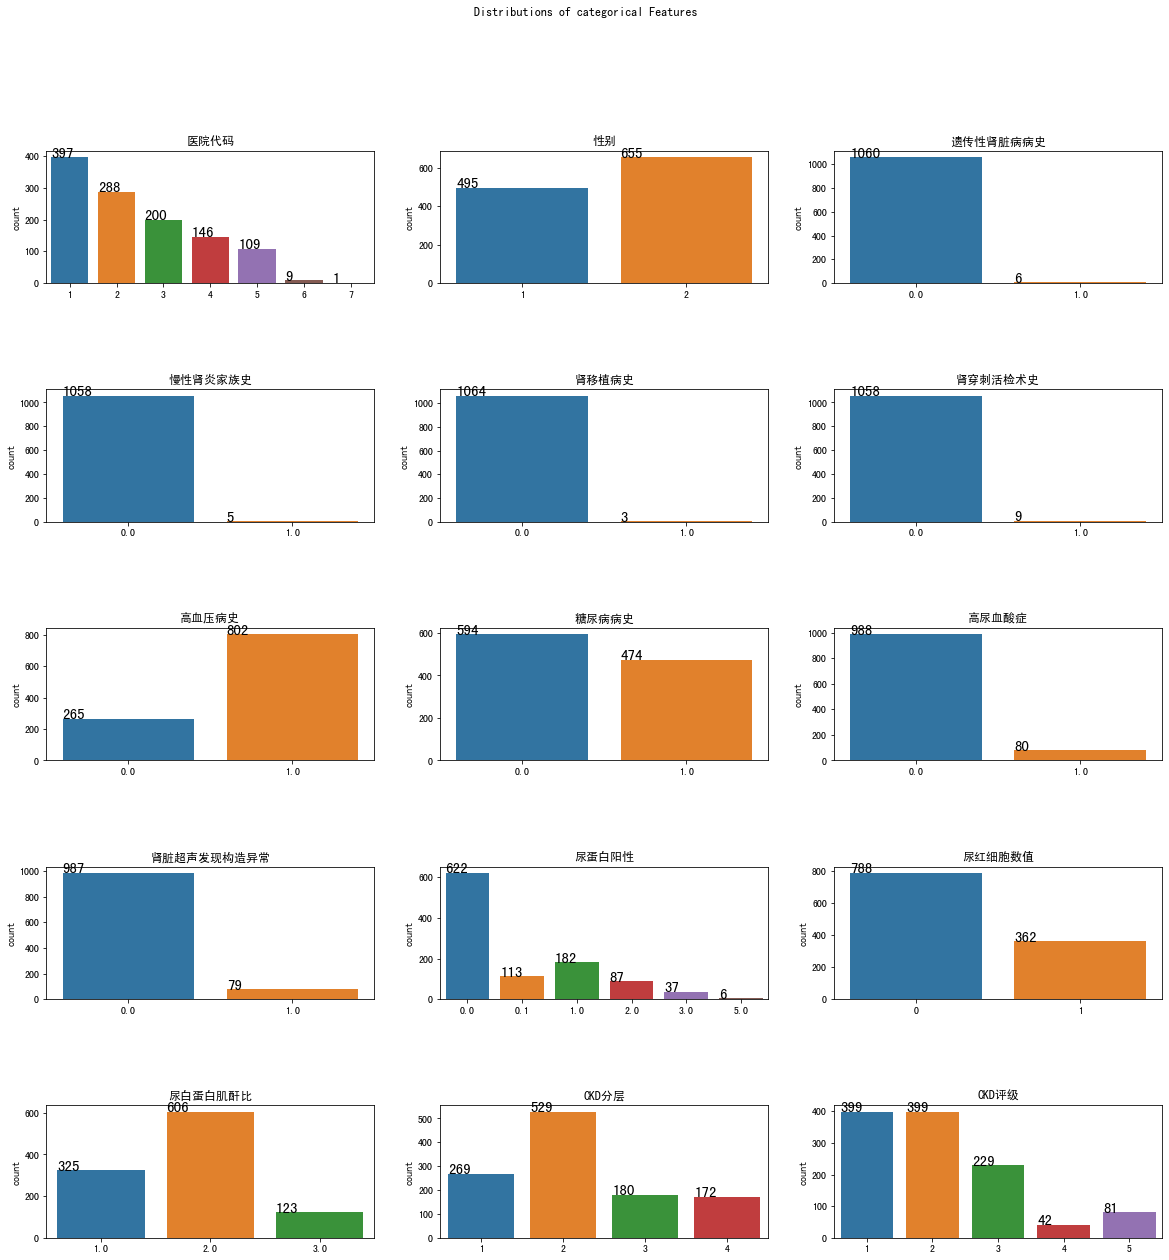

In [14]:
# 查看categorical_feature分布
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
fig.subplots_adjust(hspace=0.8)
fig.suptitle('Distributions of categorical Features')

for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(x = df[feats].values, ax=ax)
    ax.set_title(feats)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()), color='black', size=15)
#     for xtick in ax.get_xticklabels():
#         xtick.set_rotation(50)

In [15]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

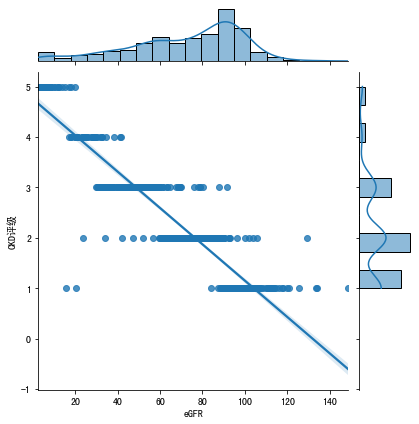

[4.75379618]
[[-0.03600986]]
0.7984294390865548
0.18325041498791672


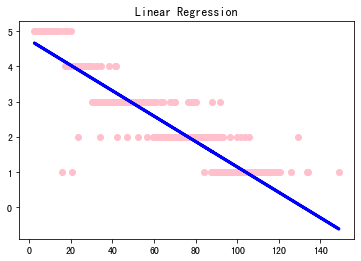

In [78]:
# 由前面相关性分析可知，eGFR肾小球过滤率与CKD评级由很强的相关性
# 做回归分析
sns.jointplot(new_data['eGFR'], new_data['CKD评级'], kind='reg')
plt.show()
linreg = LinearRegression()
plt.show()
model = linreg.fit(np.array(new_data['eGFR']).reshape(-1,1),np.array(new_data['CKD评级']).reshape(-1,1))
print(linreg.intercept_)  # 截距   4.75379618
print(linreg.coef_) # 回归系数   -0.03600986
predict = linreg.predict(np.array(new_data['eGFR']).reshape(-1,1))
print(metrics.r2_score(predict, np.array(new_data['CKD评级']).reshape(-1,1)))
print(mean_squared_error(predict, np.array(new_data['CKD评级']).reshape(-1,1)))

plt.title('Linear Regression')
plt.scatter(new_data['eGFR'], new_data['CKD评级'], color='pink', label= 'Actual CKD') #绘制初始数据点
 
plt.plot(np.array(new_data['eGFR']).reshape(-1,1), predict, color='blue', linewidth=3, label = 'Predicted CKD') #绘图

#  r2   0.7984294390865548

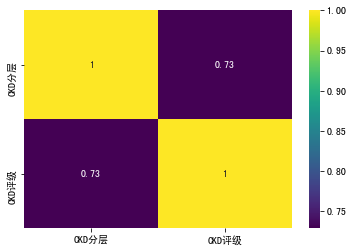

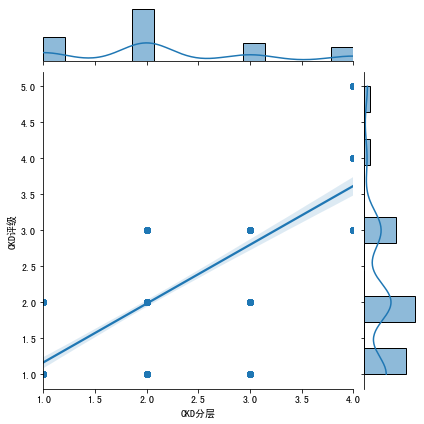

In [17]:
# 处理训练数据

df_ckd = new_data[['CKD分层','CKD评级']]
sns.heatmap(df_ckd.corr(),cmap='viridis',annot = True)
plt.show()
sns.jointplot(new_data['CKD分层'], new_data['CKD评级'], kind='reg')
plt.show()
# 可以看出'CKD评级'与CKD分层之间相关性为0.73
# 预测模型，分测试数据为两个，一个预测CKD分层，一个预测CKD评级

In [18]:
x_names = ['性别','遗传性肾脏病病史','慢性肾炎家族史','肾移植病史',
           '肾穿刺活检术史','高血压病史','糖尿病病史','高尿血酸症',
           '肾脏超声发现构造异常','尿蛋白阳性','尿红细胞数值',
           '尿白蛋白肌酐比','血肌酐','eGFR']
y1_names = ['CKD评级']  # has [1,2,3,4,5] values
y2_names = ['CKD分层']  # has [1,2,3,4] values
x1_train, x1_test, y1_train,y1_test = train_test_split(new_data[x_names].values, new_data['CKD评级'].values,random_state=0)
x2_train, x2_test, y2_train,y2_test = train_test_split(new_data[x_names].values, new_data['CKD分层'].values,random_state=0)
# 信息熵作为划分
tree11 = DecisionTreeClassifier(criterion='entropy')
# gini系数划分
tree12 = DecisionTreeClassifier(criterion='gini')
tree21 = DecisionTreeClassifier(criterion='entropy')
tree22 = DecisionTreeClassifier(criterion='gini')
tree11.fit(x1_train, y1_train)
tree12.fit(x1_train, y1_train)
tree21.fit(x2_train, y2_train)
tree22.fit(x2_train, y2_train)
predict11 = tree11.predict(x1_test)
predict12 = tree11.predict(x1_test)
predict21 = tree11.predict(x2_test)
predict22 = tree11.predict(x2_test)

print(type(predict11),type(y1_test))

print(metrics.classification_report(y1_test, predict11))
print(metrics.classification_report(y1_test, predict12))
print(metrics.classification_report(y2_test, predict21))
print(metrics.classification_report(y2_test, predict22))

# 可以看出， 当预测CKD分级时。模型表现较好，accuracy均为0.88.
# 而预测CKD分层则表现一般


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
              precision    recall  f1-score   support

           1       0.87      0.95      0.91        58
           2       0.87      0.89      0.88        80
           3       0.94      0.76      0.84        41
           4       0.85      0.92      0.88        12
           5       1.00      1.00      1.00         7

    accuracy                           0.88       198
   macro avg       0.90      0.90      0.90       198
weighted avg       0.89      0.88      0.88       198

              precision    recall  f1-score   support

           1       0.87      0.95      0.91        58
           2       0.87      0.89      0.88        80
           3       0.94      0.76      0.84        41
           4       0.85      0.92      0.88        12
           5       1.00      1.00      1.00         7

    accuracy                           0.88       198
   macro avg       0.90      0.90      0.90       198
weighted avg       0.89      

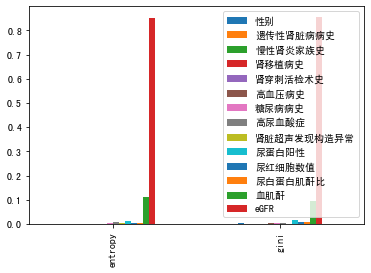

In [19]:
#系数反映每个特征的影响力。越大表示该特征在分类中起到的作用越大
# 由于上一步得出的模型预测效果，此处只看预测CKD评级的数据
tree_importances = pd.DataFrame([tree11.feature_importances_,tree12.feature_importances_],
                               columns=x_names, index=['entropy','gini'])
tree_importances.plot(kind='bar')
# 能够很明显的看出来，仅有eGFR对分类的作用很大，其次是‘血肌酐’,‘尿白蛋白肌酐比’。
# 其他特征的影响都很小了
# 训练数据
x_tree_ckd_layer_names = ['eGFR','血肌酐','尿白蛋白肌酐比']
y_ckd_rating_names = ['CKD评级']
x_r_train, x_r_test, y_r_train,y_r_test = train_test_split(new_data[x_tree_ckd_layer_names].values,
                                                          new_data[y_ckd_rating_names].values,
                                                          random_state=0)


              precision    recall  f1-score   support

           1       0.87      0.95      0.91        58
           2       0.88      0.85      0.87        80
           3       0.83      0.85      0.84        41
           4       0.89      0.67      0.76        12
           5       1.00      1.00      1.00         7

    accuracy                           0.87       198
   macro avg       0.90      0.86      0.88       198
weighted avg       0.87      0.87      0.87       198



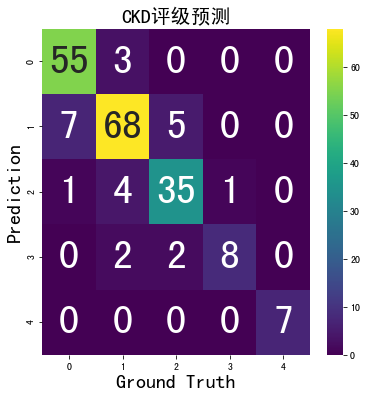

In [21]:
# 综上得出一个对于CKD评级的分类模型
ckd_rating_clk_model = DecisionTreeClassifier(criterion='gini') 
ckd_rating_clk_model.fit(x_r_train, y_r_train)
treepred1 = ckd_rating_clk_model.predict(x_r_test)
y1_score = ckd_rating_clk_model.predict_proba(x_r_test)  # 获得决策树的预测
# roc只能用于二分类，此处不适宜

_, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(metrics.confusion_matrix(y_r_test,treepred1), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True', 'False']
ax.set_ylabel('Prediction', fontsize=20);
ax.set_xlabel('Ground Truth', fontsize=20)
ax.set_title('CKD评级预测',fontsize=20)
# 可以看出预测几乎都在对角线上，表现较好
print(metrics.classification_report(y_r_test, treepred1))
# accuracy 达到0.90

In [22]:
from sklearn.ensemble import RandomForestClassifier
# 随机森林预测
rf_clf1 = RandomForestClassifier(n_estimators=10, max_depth=None, criterion='entropy', random_state=0)
rf_clf1.fit(x1_train, y1_train)
rf_clf2 = RandomForestClassifier(n_estimators=10, max_depth=None, criterion='entropy', random_state=0)
rf_clf2.fit(x2_train, y2_train)
rf_predict1 = rf_clf2.predict(x1_test)
rf_predict2 = rf_clf2.predict(x2_test)
print(pd.crosstab(y1_test, rf_predict1, rownames=['Actual class'], colnames=['predicted class']))
print(pd.crosstab(y2_test, rf_predict2, rownames=['Actual class'], colnames=['predicted class']))
print(metrics.classification_report(y1_test, rf_predict1))
print(metrics.classification_report(y2_test, rf_predict2))
# 可以看出在随机森林模型中，CKD分层的预测表现较好，accuracy达到了0.86

predicted class   1   2  3   4
Actual class                  
1                19  39  0   0
2                25  48  7   0
3                 3  25  9   4
4                 0   0  0  12
5                 0   0  0   7
predicted class   1   2   3   4
Actual class                   
1                42   8   0   0
2                 2  85   3   0
3                 3  17  10   4
4                 0   2   3  19
              precision    recall  f1-score   support

           1       0.40      0.33      0.36        58
           2       0.43      0.60      0.50        80
           3       0.56      0.22      0.32        41
           4       0.52      1.00      0.69        12
           5       0.00      0.00      0.00         7

    accuracy                           0.44       198
   macro avg       0.38      0.43      0.37       198
weighted avg       0.44      0.44      0.41       198

              precision    recall  f1-score   support

           1       0.89      0.84      0.87    

              precision    recall  f1-score   support

           1       0.93      0.86      0.90        50
           2       0.84      0.93      0.88        90
           3       0.71      0.65      0.68        34
           4       0.90      0.79      0.84        24

    accuracy                           0.85       198
   macro avg       0.85      0.81      0.83       198
weighted avg       0.85      0.85      0.85       198



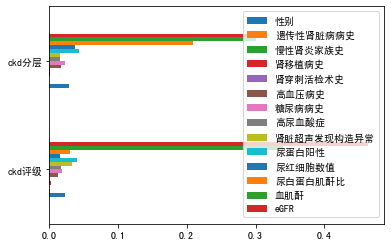

In [23]:
# 获得不同特征影响分类图
rdtree_importances = pd.DataFrame([rf_clf1.feature_importances_,rf_clf2.feature_importances_],
                               columns=x_names, index=['ckd评级','ckd分层'])
rdtree_importances.plot(kind='barh')
# 可以看出，影响ckd分层的预测比较大的特征是‘eGFR’，‘血肌酐’，‘尿白蛋白肌酐比’
# 其他因素也有一定程度影响，因此测试集的特征不做改变
x_rdtree_names = ['eGFR','血肌酐','尿白蛋白肌酐比']
y_ckd_layered_names = ['CKD分层']
x_l_train, x_l_test, y_l_train, y_l_test = train_test_split(new_data[x_rdtree_names].values,
                                                           new_data[y_ckd_layered_names].values,
                                                           random_state=0)
rf_clf3 = RandomForestClassifier(n_estimators=10, max_depth=None, criterion='entropy', random_state=0)
rf_clf3.fit(x_l_train, y_l_train)
rf_predict3 = rf_clf3.predict(x_l_test)
print(metrics.classification_report(y_l_test, rf_predict3))
# 缩小训练模型的特征元素个数后，模型变好

In [27]:
# 随机森林模型优化
#首先对n_estimators进行网格搜索
from sklearn.model_selection import GridSearchCV
#from sklearn import grid_scores_, best_params_, best_score_
param_test1= {'n_estimators':range(10,101,10), 'max_depth':range(3,10,2)}
gsearch1= GridSearchCV(estimator = RandomForestClassifier(criterion='gini',random_state=0,
                                                          max_features='sqrt',
                                                          oob_score=True),
                       param_grid =param_test1,cv=5)
gsearch1.fit(x2_train,y2_train.ravel())
gsearch1.cv_results_['mean_test_score'],gsearch1.best_params_, gsearch1.best_score_
# 可以看出n_estimators 为40时模型最好，max_depth=9,最好的分数是0.8650192280301952
# 如果按照上面特征影响图，减少特征，则best_score有相应程度降低。

(array([0.72800171, 0.75338271, 0.7652756 , 0.75851018, 0.76695627,
        0.75168779, 0.75506338, 0.75672981, 0.75672981, 0.74831221,
        0.80401652, 0.8124911 , 0.82599345, 0.81420026, 0.819285  ,
        0.82264635, 0.82434126, 0.82096567, 0.82434126, 0.82266059,
        0.81085315, 0.81082467, 0.82096567, 0.82267483, 0.8175616 ,
        0.81925652, 0.82092295, 0.8226321 , 0.82432702, 0.82602193,
        0.8176613 , 0.83283008, 0.83110668, 0.83788634, 0.83617718,
        0.82944025, 0.82434126, 0.82261786, 0.82770261, 0.82095143]),
 {'max_depth': 9, 'n_estimators': 40},
 0.8378863409770687)

0.7712040674832448
              precision    recall  f1-score   support

           1       0.94      0.88      0.91        50
           2       0.85      0.96      0.90        90
           3       0.72      0.62      0.67        34
           4       0.90      0.79      0.84        24

    accuracy                           0.86       198
   macro avg       0.85      0.81      0.83       198
weighted avg       0.86      0.86      0.86       198



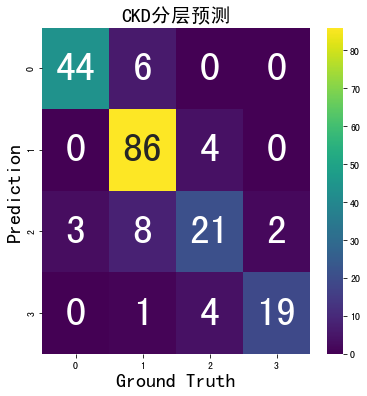

In [29]:
# 综上 ，针对CKD分层的预测模型
ckd_layered_clk_model = RandomForestClassifier(n_estimators=40, 
                                               max_depth=9,
                                               criterion='gini',
                                               random_state=0)
ckd_layered_clk_model.fit(x_l_train, y_l_train)
rdpred2 = ckd_layered_clk_model.predict(x_l_test)
y1_score = ckd_layered_clk_model.predict_proba(x_l_test)  # 获得决策树的预测

_, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(metrics.confusion_matrix(y_l_test,rdpred2), annot=True, fmt='d', cmap='viridis', annot_kws={"size": 40, "weight": "bold"})  
labels = ['True', 'False']
ax.set_ylabel('Prediction', fontsize=20);
ax.set_xlabel('Ground Truth', fontsize=20)
ax.set_title('CKD分层预测',fontsize=20)
print(metrics.r2_score(y_l_test, rdpred2))
print(metrics.classification_report(y_l_test, rdpred2))
# 可以看出预测大部分在对角线上
# accuracy = 0.86, precision=0.85, recall=0.81, f1-score=0.73

In [30]:
# 神经网络
from sklearn.neural_network import MLPClassifier

In [31]:
mlp1 = MLPClassifier()
mlp2 = MLPClassifier()
mlp1.fit(x1_train, y1_train)
mlp2.fit(x2_train,y2_train)
predmlp1 = mlp1.predict(x1_test)
predmlp2 = mlp2.predict(x2_test)
print(metrics.classification_report(y1_test, predmlp1))   # accuracy = 0.85
print(metrics.classification_report(y2_test, predmlp2))   # accuracy = 0.79

              precision    recall  f1-score   support

           1       0.81      0.95      0.87        58
           2       0.87      0.82      0.85        80
           3       0.85      0.80      0.83        41
           4       0.89      0.67      0.76        12
           5       1.00      0.86      0.92         7

    accuracy                           0.85       198
   macro avg       0.88      0.82      0.85       198
weighted avg       0.85      0.85      0.85       198

              precision    recall  f1-score   support

           1       0.93      0.76      0.84        50
           2       0.76      0.97      0.85        90
           3       0.60      0.35      0.44        34
           4       0.86      0.79      0.83        24

    accuracy                           0.79       198
   macro avg       0.79      0.72      0.74       198
weighted avg       0.79      0.79      0.77       198



In [33]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier


In [34]:

log_reg11 = LogisticRegression()
log_reg11.fit(x1_train,y1_train) # multi_class = ovr
print(log_reg11.score(x1_test, y1_test))  #分类准确率 0.8686868686868687

log_reg12 = LogisticRegression()
ovo1 = OneVsOneClassifier(log_reg12)#传入二分类器
ovo1.fit(x1_train,y1_train)
# log_reg12 = LogisticRegression(multi_class='multinomial',solver='newton-cg')  # ovo
# log_reg12.fit(x1_train,y1_train)
print(ovo1.score(x1_test, y1_test)) # 分类准确率0.8838383838383839
 
log_reg21 = LogisticRegression()
log_reg21.fit(x2_train,y2_train) # multi_class = ovr
print(log_reg21.score(x2_test, y2_test))  #分类准确率 0.7323232323232324
# 如果用OneVsRestClassifier， 分类准确率会变小


# log_reg22 = LogisticRegression(multi_class='multinomial',solver='newton-cg')  # ovo
# log_reg22.fit(x2_train,y2_train)
log_reg22 = LogisticRegression()
ovo2 = OneVsOneClassifier(log_reg22)#传入二分类器
ovo2.fit(x2_train,y2_train)
print(ovo2.score(x2_test, y2_test)) # 分类准确率 0.7777777777777778
# 两种方式准确率一样

pred11 = log_reg11.predict(x1_test)
pred12 = ovo1.predict(x1_test)
pred21 = log_reg21.predict(x2_test)
pred22 = ovo2.predict(x2_test)
print(metrics.classification_report(y1_test, pred11))  #accuracy = 0.87
print(metrics.classification_report(y1_test, pred12))  #accuracy = 0.89
print(metrics.classification_report(y2_test, pred21))  #accuracy = 0.73
print(metrics.classification_report(y2_test, pred22))  #accuracy = 0.78

0.8535353535353535
0.8636363636363636
0.8181818181818182
0.8484848484848485
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        58
           2       0.86      0.84      0.85        80
           3       0.85      0.80      0.83        41
           4       1.00      0.67      0.80        12
           5       1.00      1.00      1.00         7

    accuracy                           0.85       198
   macro avg       0.90      0.85      0.87       198
weighted avg       0.86      0.85      0.85       198

              precision    recall  f1-score   support

           1       0.83      0.93      0.88        58
           2       0.84      0.85      0.84        80
           3       0.91      0.76      0.83        41
           4       1.00      0.92      0.96        12
           5       1.00      1.00      1.00         7

    accuracy                           0.86       198
   macro avg       0.92      0.89      0.90       198
w

                ID3      CART  RdForest       MLP  Logic(OVR)  Logic(OVO)
accuracy   0.883838  0.883838  0.444444  0.848485    0.853535    0.863636
mse        0.146465  0.146465  0.601010  0.166667    0.161616    0.151515
precision  0.886728  0.886728  0.439676  0.852245    0.857903    0.867310
recall     0.883838  0.883838  0.444444  0.848485    0.853535    0.863636
f1_score   0.882637  0.882637  0.414982  0.847256    0.852471    0.863010


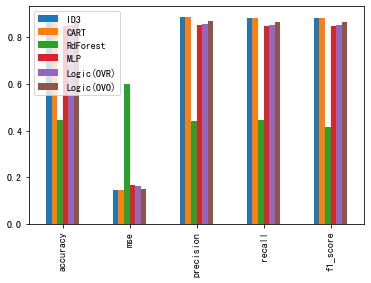

                ID3      CART  RDForest       MLP  Logic(OVR)  Logic(OVO)
accuracy   0.464646  0.464646  0.858586  0.787879    0.818182    0.848485
mse        0.641414  0.641414  0.202020  0.257576    0.212121    0.181818
precision  0.510489  0.510489  0.857460  0.785635    0.814330    0.846494
recall     0.464646  0.464646  0.858586  0.787879    0.818182    0.848485
f1_score   0.478712  0.478712  0.855259  0.773160    0.804986    0.842913


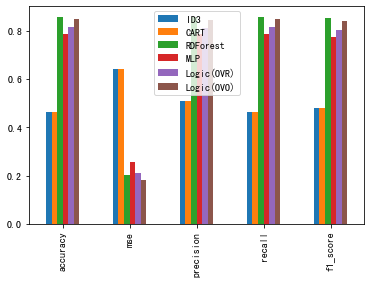

In [42]:
# 综合分析
# id3树， cart树， 随机森林，神经网络，逻辑回归(ovr), 逻辑回归(ovo) (2+2+2+2+2+2)
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
# CKD评级
model_accuracy1 = [accuracy_score(y1_test,predict11),accuracy_score(y1_test,predict12),
                  accuracy_score(y1_test,rf_predict1), accuracy_score(y1_test, predmlp1),
                  accuracy_score(y1_test, pred11), accuracy_score(y1_test, pred12)]

model_mse1 = [mean_squared_error(y1_test,predict11),mean_squared_error(y1_test,predict12),
              mean_squared_error(y1_test,rf_predict1), mean_squared_error(y1_test, predmlp1),
             mean_squared_error(y1_test, pred11), mean_squared_error(y1_test, pred12)]

model_precision1 = [precision_score(y1_test, predict11, average='weighted'),precision_score(y1_test, predict12, average='weighted'),
                    precision_score(y1_test,rf_predict1, average='weighted'), precision_score(y1_test, predmlp1, average='weighted'),
                   precision_score(y1_test, pred11, average='weighted'), precision_score(y1_test, pred12, average='weighted')]

model_recall1 = [recall_score(y1_test, predict11, average='weighted'),recall_score(y1_test, predict12, average='weighted'),
                 recall_score(y1_test,rf_predict1, average='weighted'), recall_score(y1_test, predmlp1, average='weighted'),
                recall_score(y1_test, pred11, average='weighted'), recall_score(y1_test, pred12, average='weighted')]

model_f1_score1  = [f1_score(y1_test,predict11, average='weighted'),f1_score(y1_test,predict12, average='weighted'),
                    f1_score(y1_test,rf_predict1, average='weighted'), f1_score(y1_test, predmlp1, average='weighted'),
                   f1_score(y1_test, pred11, average='weighted'), f1_score(y1_test, pred12, average='weighted')] 

# CKD分层
model_accuracy2 = [accuracy_score(y2_test,predict21),accuracy_score(y2_test,predict22),
                   accuracy_score(y_l_test,rdpred2), accuracy_score(y2_test, predmlp2),
                   accuracy_score(y2_test, pred21), accuracy_score(y2_test, pred22)]

model_mse2 = [mean_squared_error(y2_test,predict21),mean_squared_error(y2_test,predict22),
              mean_squared_error(y_l_test,rdpred2), mean_squared_error(y2_test, predmlp2),
              mean_squared_error(y2_test, pred21), mean_squared_error(y2_test, pred22)]

model_precision2 = [precision_score(y2_test, predict21, average='weighted'),precision_score(y2_test, predict22, average='weighted'),
                    precision_score(y_l_test,rdpred2, average='weighted'), precision_score(y2_test, predmlp2, average='weighted'),
                   precision_score(y2_test, pred21, average='weighted'), precision_score(y2_test, pred22, average='weighted')]

model_recall2 = [recall_score(y2_test, predict21, average='weighted'),recall_score(y2_test, predict22, average='weighted'),
                 recall_score(y_l_test,rdpred2, average='weighted'), recall_score(y2_test, predmlp2, average='weighted'),
                recall_score(y2_test, pred21, average='weighted'), recall_score(y2_test, pred22, average='weighted')]

model_f1_score2  = [f1_score(y2_test,predict21, average='weighted'),f1_score(y2_test,predict22, average='weighted'),
                    f1_score(y_l_test,rdpred2, average='weighted'), f1_score(y2_test, predmlp2, average='weighted'),
                   f1_score(y2_test, pred21, average='weighted'), f1_score(y2_test, pred22, average='weighted')] 

model_list_score1 = pd.DataFrame(
    data=[model_accuracy1,model_mse1,model_precision1,model_recall1,model_f1_score1],
    columns=['ID3','CART','RdForest','MLP','Logic(OVR)','Logic(OVO)'],
    index=['accuracy','mse','precision','recall','f1_score'])

print(model_list_score1)
model_list_score1.plot(kind='bar')
plt.show()

model_list_score2 = pd.DataFrame(
    data=[model_accuracy2,model_mse2,model_precision2,model_recall2,model_f1_score2],
    columns=['ID3','CART','RDForest','MLP','Logic(OVR)','Logic(OVO)'],
    index=['accuracy','mse','precision','recall','f1_score'])

print(model_list_score2)
model_list_score2.plot(kind='bar')
plt.show()

In [621]:
# 综上  ckd评级，总体表现都比较好，准确率都能达到0.8以上，最好的模型是逻辑回归ovo
# ckd分层，预测效果不是那么好，表现最好的模型是优化后的随机森林

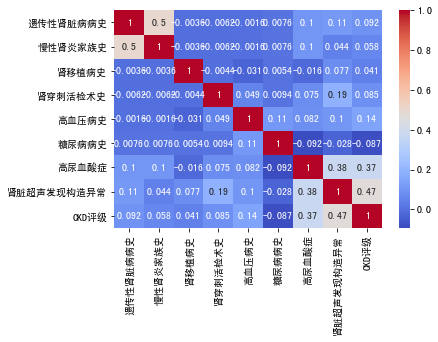

[[0.   0.   0.   ... 0.   0.11 2.  ]
 [0.   0.   0.   ... 0.   0.11 2.  ]
 [0.   0.   0.   ... 0.   0.11 2.  ]
 ...
 [0.   0.   0.   ... 0.   0.11 2.  ]
 [0.   0.   0.   ... 0.   0.   2.  ]
 [0.   0.   0.   ... 0.   0.11 2.  ]]


In [44]:
TFdata_names = ['遗传性肾脏病病史','慢性肾炎家族史','肾移植病史','肾穿刺活检术史','高血压病史','糖尿病病史','高尿血酸症','肾脏超声发现构造异常','CKD评级']
TFdata = new_data[TFdata_names];
sns.heatmap(TFdata.corr(),cmap='coolwarm',annot = True)
plt.show()
# # 分析相关性得知，这些数据都与CKD相关性不高，但数据不用浪费。
# # 因此按照关系热力图，人为设置加权，取这些数据平均
# # 糖尿病病史呈负相关，丢弃
TFdata_names.remove('糖尿病病史')
dt = np.array(new_data[TFdata_names])
weight = [0.073,0.046,0.033,0.068,0.11,0.295,0.375]
ad = [[1,1,0,0,0,0,1],[1,1,0,0,0,0,1]]
wt = []
for i in np.arange(len(dt)):
    sum = 0
    for j in np.arange(len(weight)):
        sum = sum + dt[i][j]*weight[j]
    wt.append(sum)
dt = np.insert(dt,7, values=wt,axis = 1) # 加一列
print(dt)

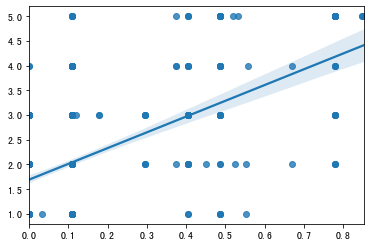

In [45]:
sns.regplot(x=dt[:,7], y=dt[:,8])
plt.show()

In [46]:
#  线性回归
rg1_train,rg1_test,rg2_train,rg2_test = train_test_split(dt[:,7].reshape(-1,1),dt[:,8].reshape(-1,1),random_state=0)
linreg = LinearRegression()
model = linreg.fit(rg1_train,rg2_train)
print(linreg.intercept_)  # 截距  1.68005755
print(linreg.coef_) # 回归系数 3.18780447
# CKD = 3.18780447* weight + 1.68005755
lreg_predict = linreg.predict(rg1_test)

[1.68005755]
[[3.18780447]]


In [47]:
# 模型评估
print(mean_squared_error(rg2_test, lreg_predict),
      metrics.r2_score(rg2_test, lreg_predict))
# 0.8094023856641319 0.22218327464514598

0.8094023856641319 0.22218327464514598


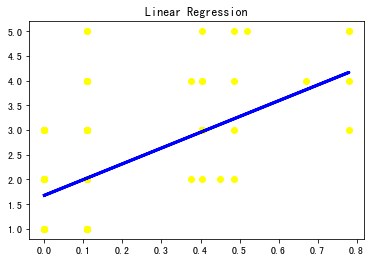

In [48]:
plt.title('Linear Regression')
 
#测试集图
 
plt.scatter(rg1_test, rg2_test, color='yellow', label= 'Actual CKD') #绘制初始数据点
 
plt.plot(rg1_test, linreg.predict(rg1_test), color='blue', linewidth=3, label = 'Predicted CKD') #绘图
 
plt.show()

In [52]:
# 聚类分析
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

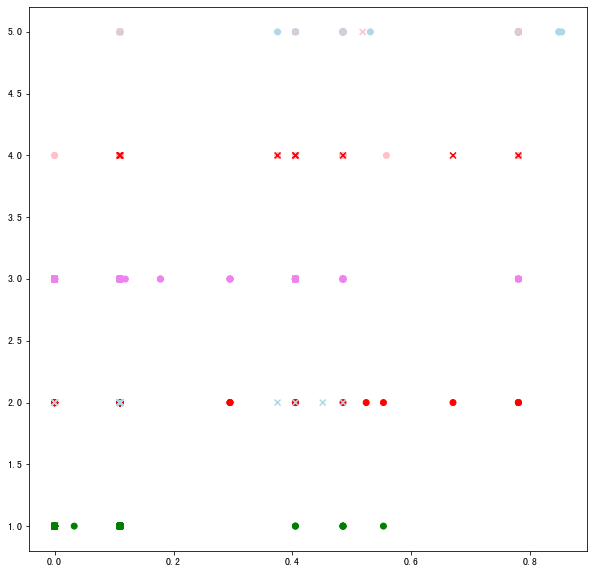

In [53]:
cluster_data = dt[:,7:9]
ttrain, ttest = train_test_split(cluster_data,random_state=0)

cluster_pred = KMeans(n_clusters=5, random_state=0).fit_predict(ttrain)
plt.figure(figsize=(10, 10))
color = ("red","lightblue", "green","violet","pink")
colors=np.array(color)[cluster_pred]
plt.scatter(ttrain[:, 0], ttrain[:, 1], c=colors)

kmeans = KMeans(n_clusters=5, random_state=0).fit(cluster_data)
colors2 = np.array(color)[kmeans.predict(ttest)]
plt.scatter(ttest[:, 0], ttest[:, 1], c=colors2, marker='x')
plt.show()

790


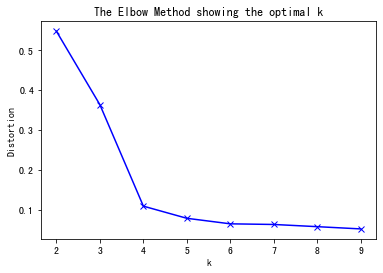

In [54]:
# k means determine k
distortions = []
print(cluster_data.shape[0])
K = range(2, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_data)
    distortions.append(np.sum(np.min(cdist(cluster_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / cluster_data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#  可以看出k=4比较合适

[4 1 1 3]


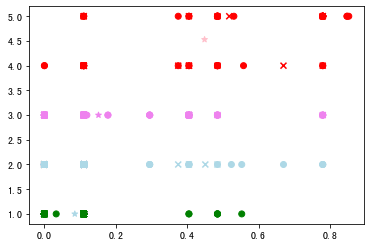

In [55]:
kmodel = KMeans(n_clusters=4, random_state=0).fit(cluster_data)
cluster_pred = kmodel.predict(ttrain)
colors3=np.array(color)[cluster_pred]
plt.scatter(ttrain[:, 0], ttrain[:, 1], c=colors3)

colors4 = np.array(color)[kmodel.predict(ttest)]
plt.scatter(ttest[:, 0], ttest[:, 1], c=colors4, marker='x')
array = kmodel.cluster_centers_[:,1].astype(np.uint8)
print(array)
colors5 = np.array(color)[array]
plt.scatter(kmodel.cluster_centers_[:,0],kmodel.cluster_centers_[:,1],c = colors5,marker='*')
plt.show()

In [56]:
print(kmodel.predict(ttest))
array2 = ttest[:,1].astype(np.uint8)
print(array2)
print(mean_squared_error(array2, kmodel.predict(ttest)))
# 2.55

[1 1 2 2 1 2 2 1 2 3 1 0 3 2 3 1 1 3 2 3 1 1 1 1 2 3 2 3 2 2 2 0 1 1 3 1 1
 1 3 1 1 1 0 3 2 3 3 2 0 0 1 2 3 1 1 3 2 2 1 3 2 1 1 1 3 1 0 2 0 1 3 1 3 2
 3 2 3 1 2 1 1 0 1 0 2 0 2 2 1 2 1 2 1 1 3 1 3 1 0 3 2 2 3 1 1 2 1 1 3 2 3
 1 1 2 2 2 2 1 0 3 1 2 1 3 0 2 1 2 2 1 0 3 1 2 2 2 1 1 1 2 3 0 2 1 3 1 3 1
 1 2 2 2 0 3 2 1 3 1 3 1 1 2 1 3 1 1 1 2 1 3 0 2 1 2 3 3 1 1 2 1 1 1 2 2 1
 3 1 2 0 1 0 2 2 1 1 1 3 1]
[2 2 1 1 2 1 1 2 1 3 2 4 3 1 3 2 2 3 1 3 2 2 2 2 1 3 1 3 1 1 1 4 2 2 3 2 2
 2 3 2 2 2 4 3 1 3 3 1 5 5 2 1 3 2 2 3 1 1 2 3 1 2 2 2 3 2 5 1 4 2 3 2 3 1
 3 1 3 2 1 2 2 5 2 4 1 4 1 1 2 1 2 1 2 2 3 2 3 2 4 3 1 1 3 2 2 1 2 2 3 1 3
 2 2 1 1 1 1 2 4 3 2 1 2 3 4 1 2 1 1 2 5 3 2 1 1 1 2 2 2 1 3 4 1 2 3 2 3 2
 2 1 1 1 5 3 1 2 3 2 3 2 2 1 2 3 2 2 2 1 2 3 5 1 2 1 3 3 2 2 1 2 2 2 1 1 2
 3 2 1 4 2 4 1 1 2 2 2 3 2]
2.5505050505050506
